# Lab 2 - Pandas och data processing
Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

## Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera matplotlib grafer
i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar mm.


### Uppgift 1
I den här uppgiften ska du visualisera med hjälp av matplotlib

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Read the data from page 'Engelska' from the XLSX file and store in a dataframe
df_eng = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Engelska', header=8)
df_sve = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Svenska', header=8)
df_sve_andra = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', header=8)
df_matte = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Matematik', header=8)

df_list = [df_eng, df_sve, df_sve_andra, df_matte]

# Rename the columns in all the dataframes
for df in df_list:
    df.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    df["Totalt (poäng)"] = df["Totalt (poäng)"].replace("..", "0")  # Replace ".." with "0"
    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors="coerce")  # Convert to number

# Display the contents of the dataframe with index 0
df_list[0]



,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


---

b) För de olika ämnena, rita ett stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en
plott med subplottar

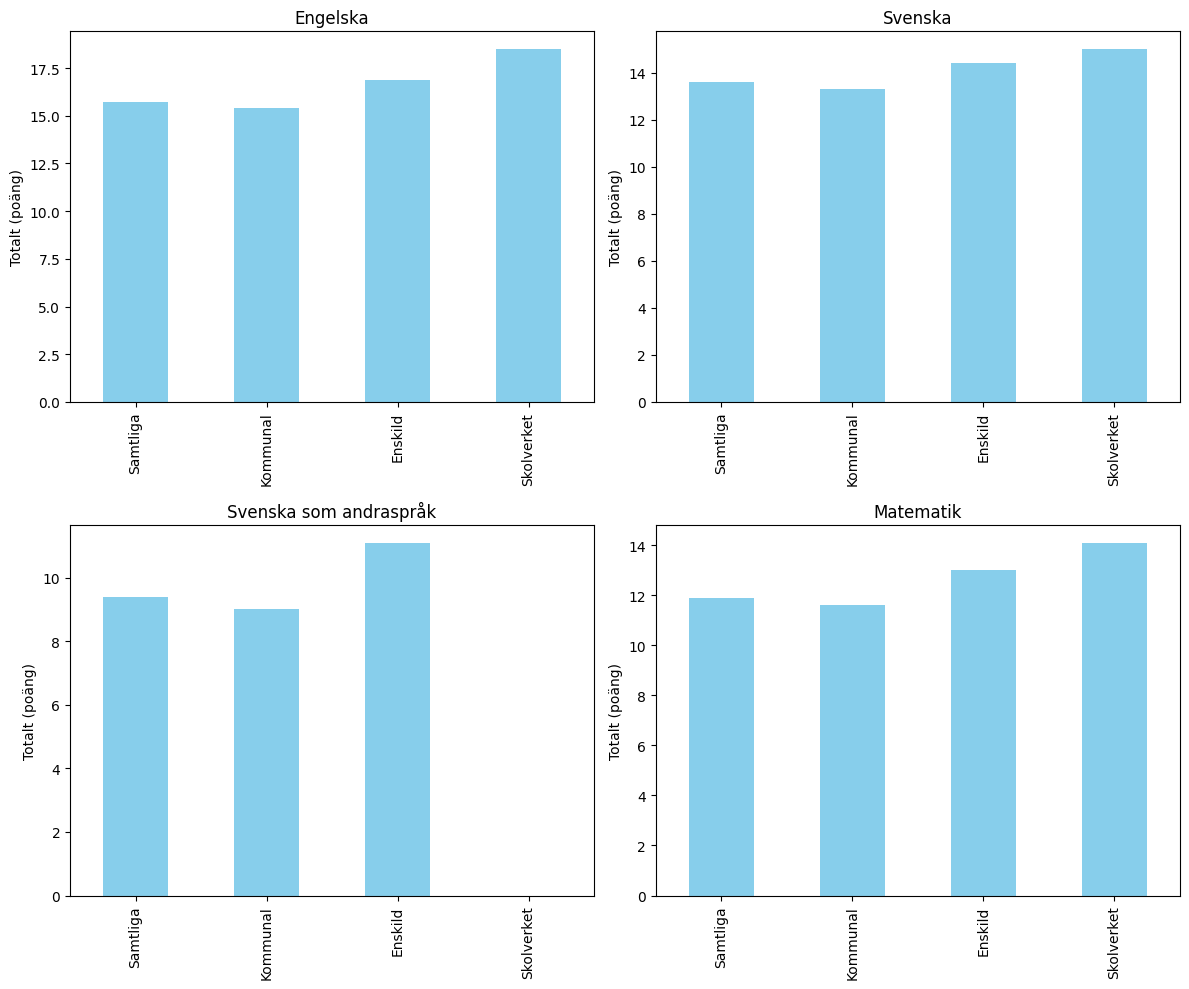

In [51]:
# Subject names for titles
subjects = ["Engelska", "Svenska", "Svenska som andraspråk", "Matematik"]

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array so we can iterate over it easily
axes = axes.flatten()

# Loop through each dataframe and plot in the corresponding subplot
for i, df in enumerate(df_list):
    df.plot(
        x='Huvudman', 
        y='Totalt (poäng)', 
        kind='bar', 
        ax=axes[i], 
        legend=False,  # Hide legend
        color='skyblue'
    )
    
    axes[i].set_title(subjects[i])  # Set title for each subplot
    axes[i].set_ylabel("Totalt (poäng)")  # Label y-axis
    axes[i].set_xlabel("")  # "Hide" x-axis label

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the full figure with all subplots
plt.show()

---

### Uppgift 2
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.